In [23]:
import pandas as pd
import re
import numpy as np
import os

In [24]:
df = pd.read_csv('../data/raw-data/googleplaystore.csv')

## Data Exploration


In [25]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [26]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [27]:
df.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

## Data Cleaning and transforming

#### Remove duplicates

In [28]:
df[df.duplicated(keep='first')]
df = df.sort_values(by=['App', 'Reviews'], ascending=[True, False])
df = df.drop_duplicates(subset=['App'], keep='first')

#### Reviews

* while preprocessing the Review column, we found  that there text values in the column

* by viewing this we can say that the row has shifted value and cannot be used, so we will drop it

In [29]:

df.reset_index(inplace=True)
df[df['Reviews'] == '3.0M']

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5806,10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [30]:
df = df.drop(5806, axis=0)

In [31]:
df['Reviews'] = df['Reviews'].apply(lambda x: int(x))

#### Installs

* Remove "+" & "," and convert to int type

In [32]:
df['Installs'] = df['Installs'].apply(lambda x: int(x.replace('+', '').replace(',', '')))

### Size

* Remove "M" & "K" and convert KB size to MB size

In [33]:
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '').replace(',', ''))

In [34]:
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)

* while preprocessing the Size column, we found that there are some values with 'Varies with device' which is not a valid value, so will convert them into NAN 

In [35]:
df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', '0') if 'Varies with device' in str(x) else x)

In [36]:
df['Size'] = df['Size'].apply(lambda x: float(x) * 1_000_000)

* convert 'Varies with device' to NaN

In [37]:
df['Size'].describe()

count    9.659000e+03
mean     1.780249e+07
std      2.149347e+07
min      0.000000e+00
25%      2.900000e+06
50%      9.100000e+06
75%      2.500000e+07
max      1.000000e+08
Name: Size, dtype: float64

In [38]:
df['Size'].isnull().sum()

0

### Price

* Remove "$" sign and convert to float

In [39]:
df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df['Price'] = df['Price'].apply(lambda x: float(x))

In [40]:
# df['Price'].isnull().sum()
df['Price'].describe()

count    9659.000000
mean        1.099299
std        16.852152
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

### Dates

In [41]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df["year"] = df["Last Updated"].dt.year
# df["month"] = df["Last Updated"].dt.month

In [42]:
df['year'].min(), df['year'].max()  

(2010, 2018)

## Transform

### Number of apps and average rating by Category 


In [43]:
# groups = df.groupby('Category').filter(lambda x: len(x) > 300).reset_index()

# # calculate the average rating
# average_rating = np.nanmean(groups['Rating'])

# # create a list of categories
# categories = list(set(groups['Category']))

# #prepare data for each category
# category_data = []
# for category in categories:
#     category_dict = {
#         'Category': category,
#         'Average_Rating': np.nanmean(groups.loc[groups['Category'] == category]['Rating']),
#         'Number_of_Apps': len(groups.loc[groups['Category'] == category]),
#     }
#     category_data.append(category_dict)


# df_category_summary = pd.DataFrame(category_data)

# df_category_summary


## Analysis


In [73]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})

import plotly
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly.figure_factory as ff
# import cufflinks as cf
import streamlit as st


### Type


In [79]:
analysis_df = df.copy()

In [48]:
analysis_df.columns

Index(['index', 'App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'year'],
      dtype='object')

In [70]:
number_of_apps_in_category = analysis_df['Category'].value_counts().sort_values(ascending=True)

data = [go.Pie(
        labels = number_of_apps_in_category.index,
        values = number_of_apps_in_category.values,
        hoverinfo = 'label+value'
    
)]

plotly.offline.iplot(data, filename='active_category')

In [75]:
analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 9659
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           9659 non-null   int64         
 1   App             9659 non-null   object        
 2   Category        9659 non-null   object        
 3   Rating          8196 non-null   float64       
 4   Reviews         9659 non-null   int64         
 5   Size            9659 non-null   float64       
 6   Installs        9659 non-null   int64         
 7   Type            9658 non-null   object        
 8   Price           9659 non-null   float64       
 9   Content Rating  9659 non-null   object        
 10  Genres          9659 non-null   object        
 11  Last Updated    9659 non-null   datetime64[ns]
 12  Current Ver     9651 non-null   object        
 13  Android Ver     9657 non-null   object        
 14  year            9659 non-null   int32         
 15  year_adde

In [90]:
# COUNT ANALYSIS_DF['PRICE] OUNTS VALUE WITH PRICE GREATER THAN 100
analysis_df[analysis_df['year_added'] > 2018]

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year,year_added,month_added


In [71]:
data = [go.Histogram(
        x = df.Rating,
        xbins = {'start': 1, 'size': 0.1, 'end' :5}
)]

print('Average app rating = ', np.mean(df['Rating']))
plotly.offline.iplot(data, filename='overall_rating_distribution')

Average app rating =  4.173084431429967


F_onewayResult(statistic=12.386552661485545, pvalue=1.2435020988432742e-19)

The p-value is extremely small, hence we reject the null hypothesis in favor of the alternate hypothesis.



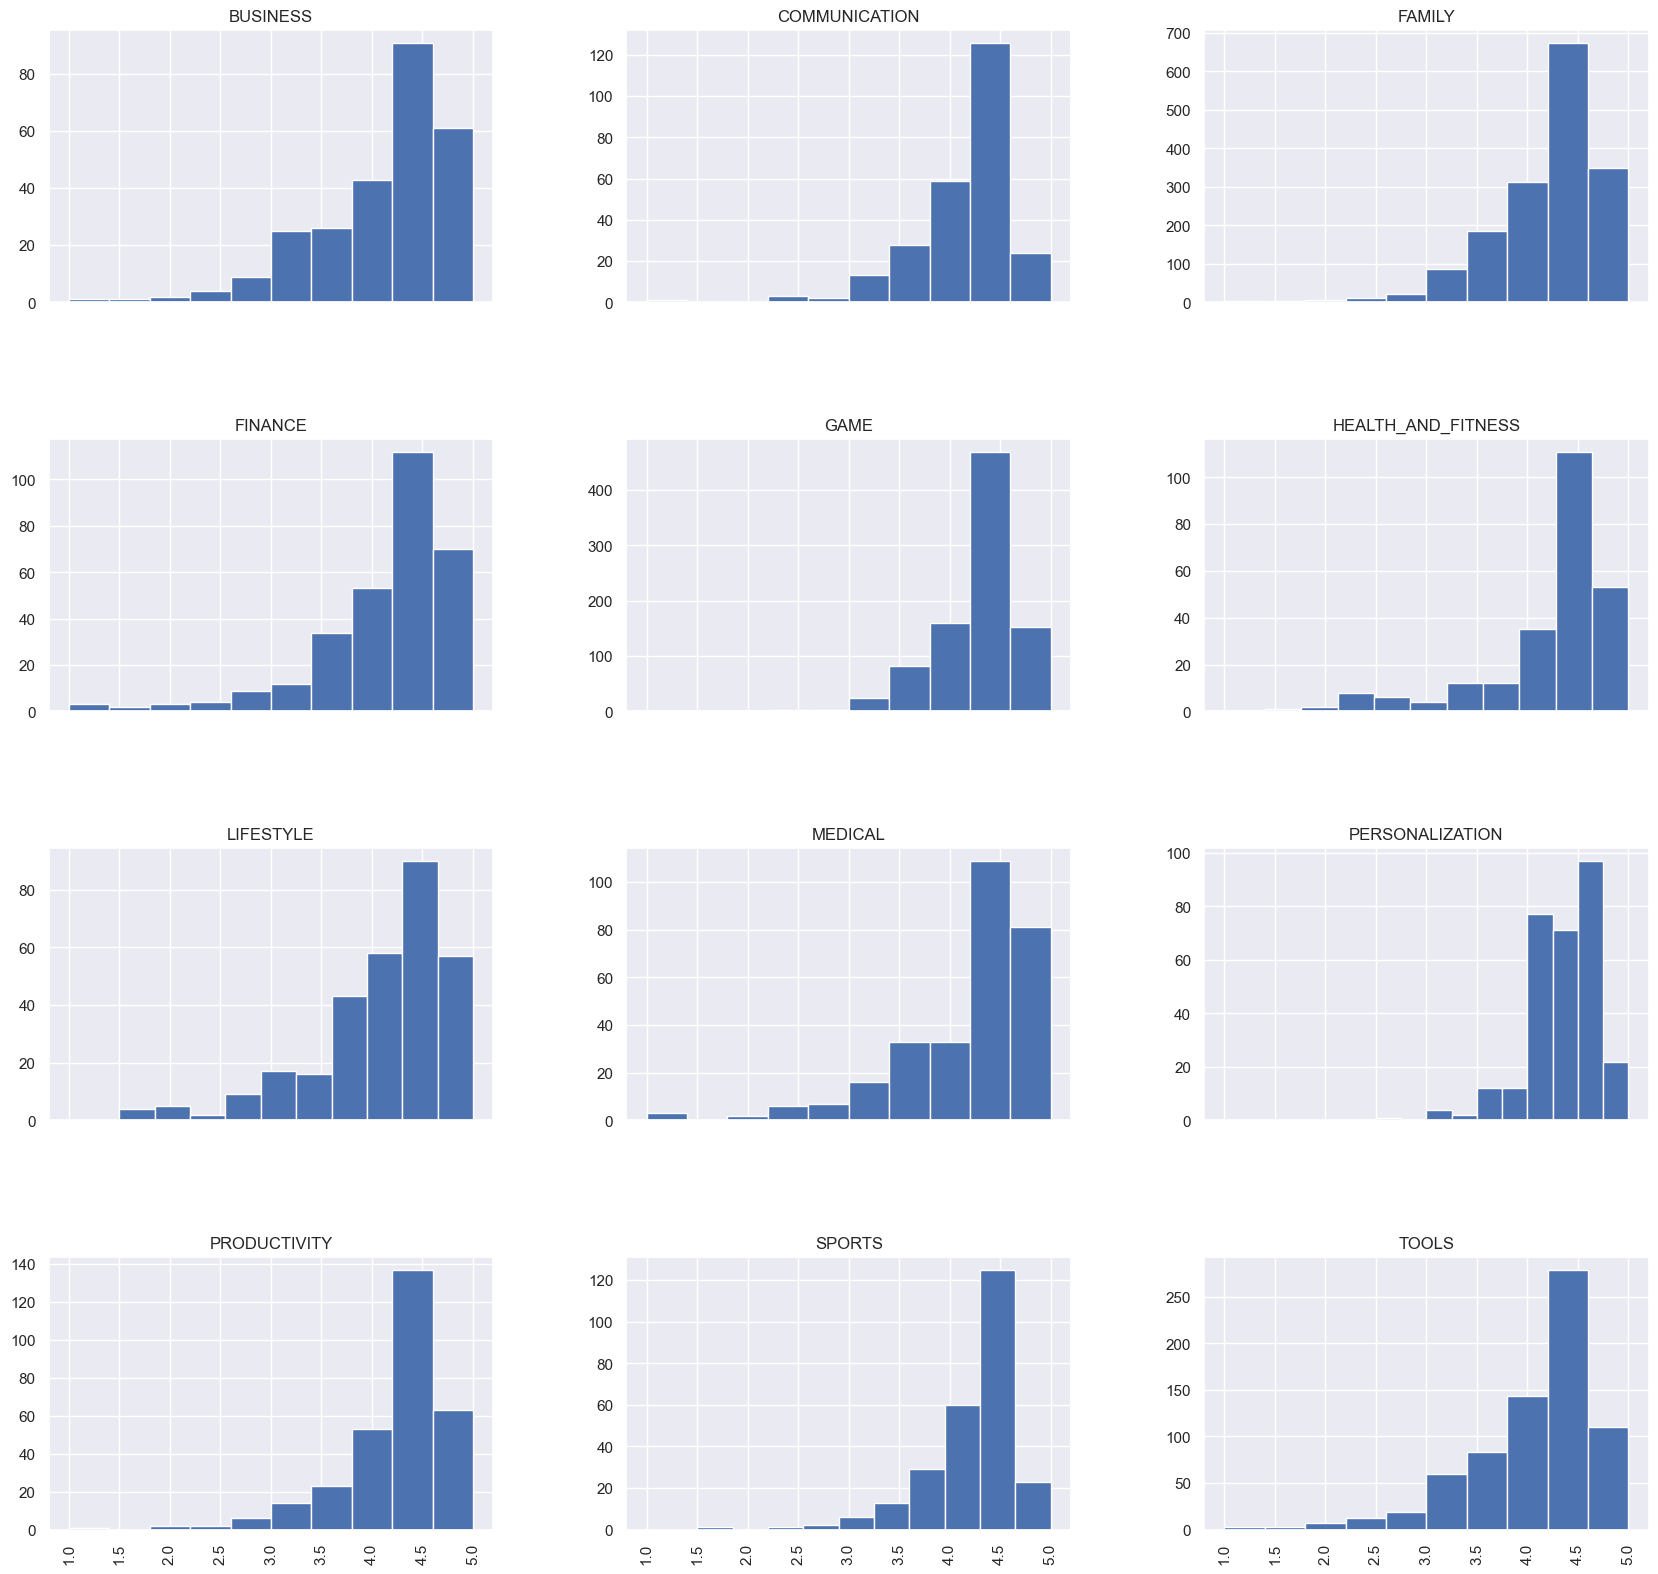

In [72]:
import scipy.stats as stats
f = stats.f_oneway(df.loc[df.Category == 'BUSINESS']['Rating'].dropna(), 
               df.loc[df.Category == 'FAMILY']['Rating'].dropna(),
               df.loc[df.Category == 'GAME']['Rating'].dropna(),
               df.loc[df.Category == 'PERSONALIZATION']['Rating'].dropna(),
               df.loc[df.Category == 'LIFESTYLE']['Rating'].dropna(),
               df.loc[df.Category == 'FINANCE']['Rating'].dropna(),
               df.loc[df.Category == 'EDUCATION']['Rating'].dropna(),
               df.loc[df.Category == 'MEDICAL']['Rating'].dropna(),
               df.loc[df.Category == 'TOOLS']['Rating'].dropna(),
               df.loc[df.Category == 'PRODUCTIVITY']['Rating'].dropna()
              )

print(f)
print('\nThe p-value is extremely small, hence we reject the null hypothesis in favor of the alternate hypothesis.\n')
#temp = df.loc[df.Category.isin(['BUSINESS', 'DATING'])]

groups = df.groupby('Category').filter(lambda x: len(x) > 286).reset_index()
array = groups['Rating'].hist(by=groups['Category'], sharex=True, figsize=(20,20))

In [ ]:
analysis_df.to_csv('../data/analysis-data/dashboard.csv', index=False)